<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Lab: Exploratory Data Analysis**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis or EDA. 


## Objectives


In this lab, you will perform the following:


- Examine the structure of a dataset.

- Handle missing values effectively.

- Conduct summary statistics on key columns.

- Analyze employment status, job satisfaction, programming language usage, and trends in remote work.


## Hands on Lab


#### Step 1: Install and Import Libraries


Install the necessary libraries for data manipulation and visualization.


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 107.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 118.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 129.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 121.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 88.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 155.9 MB/s eta 0:00:00


#### Step 2: Load and Preview the Dataset
Load the dataset from the provided URL. Use df.head() to display the first few rows to get an overview of the structure.


In [2]:
# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Set pandas option to display all columns
pd.set_option('display.max_columns', None)

# Display the first few rows of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disa

#### Step 3: Handling Missing Data


Identify and manage missing values in critical columns such as `Employment`, `JobSat`, and `RemoteWork`. Implement a strategy to fill or drop these values, depending on the significance of the missing data.


In [3]:
## Write your code here
missing_data = df[['Employment', 'JobSat', 'RemoteWork']].isnull().sum()
print(missing_data)


Employment        0
JobSat        36311
RemoteWork    10631
dtype: int64


#### Step 4: Analysis of Experience and Job Satisfaction


Analyze the relationship between years of professional coding experience (`YearsCodePro`) and job satisfaction (`JobSat`). Summarize `YearsCodePro` and calculate median satisfaction scores based on experience ranges.

- Create experience ranges for `YearsCodePro` (e.g., `0-5`, `5-10`, `10-20`, `>20` years).

- Calculate the median `JobSat` for each range.

- Visualize the relationship using a bar plot or similar visualization.


/tmp/ipykernel_299/2759741539.py:34: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_satisfaction = df.groupby('ExperienceRange')['JobSatScore'].median().reset_index()
/tmp/ipykernel_299/2759741539.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=median_satisfaction, x='ExperienceRange', y='JobSatScore', palette='crest')


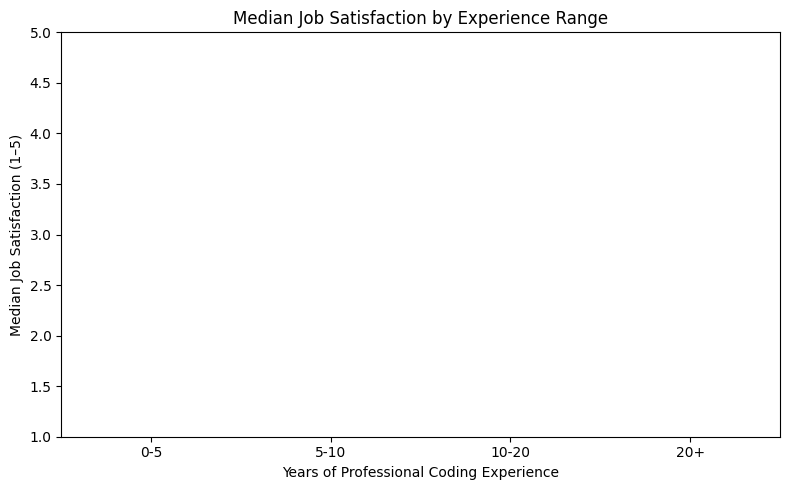

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Convert YearsCodePro to numeric values
def convert_experience(val):
    if val == "Less than 1 year":
        return 0.5
    elif val == "More than 50 years":
        return 51
    try:
        return float(val)
    except:
        return None

df['YearsCodePro'] = df['YearsCodePro'].apply(convert_experience)

# Step 2: Map JobSat to numerical satisfaction scores
job_sat_mapping = {
    'Very dissatisfied': 1,
    'Slightly dissatisfied': 2,
    'Neither satisfied nor dissatisfied': 3,
    'Slightly satisfied': 4,
    'Very satisfied': 5
}
df['JobSatScore'] = df['JobSat'].map(job_sat_mapping)

# Step 3: Create experience ranges
bins = [0, 5, 10, 20, 100]
labels = ['0-5', '5-10', '10-20', '20+']
df['ExperienceRange'] = pd.cut(df['YearsCodePro'], bins=bins, labels=labels, right=False)

# Step 4: Group by experience range and calculate median job satisfaction
median_satisfaction = df.groupby('ExperienceRange')['JobSatScore'].median().reset_index()

# Step 5: Plot the relationship
plt.figure(figsize=(8, 5))
sns.barplot(data=median_satisfaction, x='ExperienceRange', y='JobSatScore', palette='crest')
plt.title('Median Job Satisfaction by Experience Range')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Median Job Satisfaction (1–5)')
plt.ylim(1, 5)
plt.tight_layout()
plt.show()


#### Step 5: Visualize Job Satisfaction


Use a count plot to show the distribution of `JobSat` values. This provides insights into the overall satisfaction levels of respondents.


/tmp/ipykernel_299/3034855644.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_job_sat, x='JobSat', order=df_job_sat['JobSat'].value_counts().index, palette='pastel')


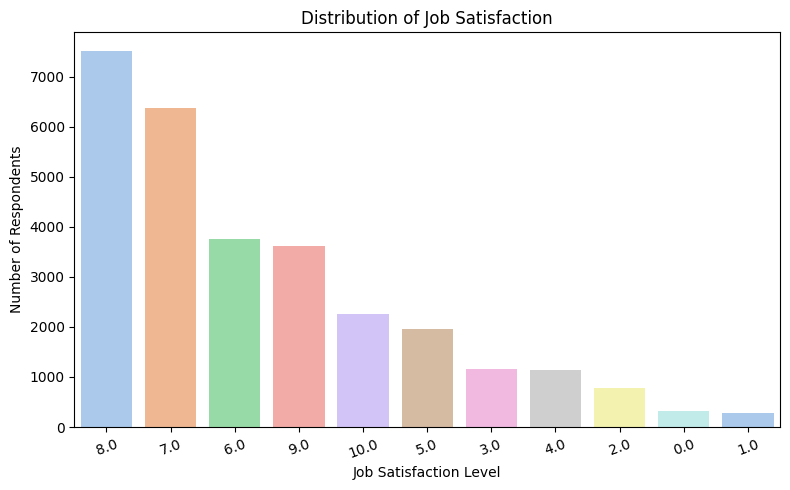

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Drop missing values in JobSat if any
df_job_sat = df.dropna(subset=['JobSat'])

# Plot Job Satisfaction distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=df_job_sat, x='JobSat', order=df_job_sat['JobSat'].value_counts().index, palette='pastel')
plt.title('Distribution of Job Satisfaction')
plt.xlabel('Job Satisfaction Level')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

#### Step 6: Analyzing Remote Work Preferences by Job Role


Analyze trends in remote work based on job roles. Use the `RemoteWork` and `Employment` columns to explore preferences and examine if specific job roles prefer remote work more than others.

- Use a count plot to show remote work distribution.

- Cross-tabulate remote work preferences by employment type (e.g., full-time, part-time) and job roles.


/tmp/ipykernel_299/3043630000.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_filtered, x='RemoteWork', order=df_filtered['RemoteWork'].value_counts().index, palette='Set2')


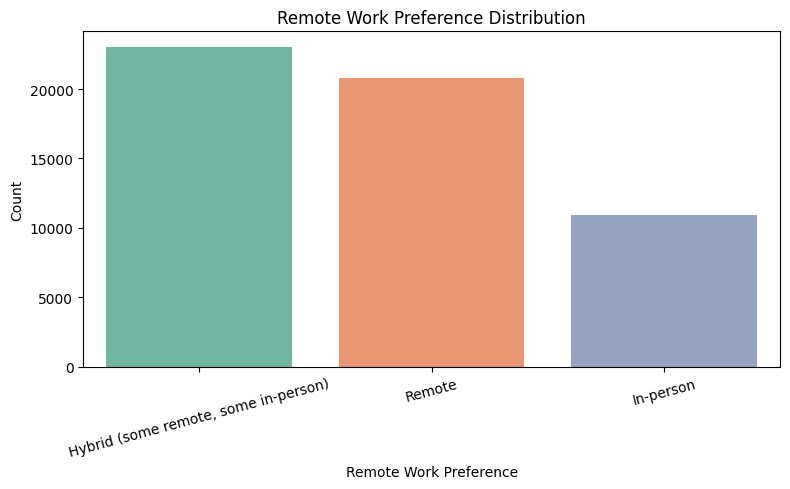

Cross-tabulation of Remote Work Preferences by Job Role and Employment Type (%):
RemoteWork                                         Hybrid (some remote, some in-person)  \
Employment                                                          Employed, full-time   
Employment                                                                                
Employed, full-time                                                               44.28   
Employed, full-time;Employed, part-time                                            0.00   
Employed, full-time;Independent contractor, fre...                                 0.00   
Employed, full-time;Independent contractor, fre...                                 0.00   
Employed, full-time;Independent contractor, fre...                                 0.00   
Employed, full-time;Independent contractor, fre...                                 0.00   
Employed, full-time;Independent contractor, fre...                                 0.00   
Employed,

In [11]:
## Write your code here
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Drop missing values in key columns
df_filtered = df.dropna(subset=['RemoteWork', 'Employment'])  

# Step 2: Count plot - Distribution of Remote Work Preferences
plt.figure(figsize=(8, 5))
sns.countplot(data=df_filtered, x='RemoteWork', order=df_filtered['RemoteWork'].value_counts().index, palette='Set2')
plt.title('Remote Work Preference Distribution')
plt.xlabel('Remote Work Preference')
plt.ylabel('Count')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

# Step 3: Cross-tabulate RemoteWork by Employment type and Employment
cross_tab = pd.crosstab(index=df_filtered['Employment'],
                        columns=[df_filtered['RemoteWork'], df_filtered['Employment']],
                        normalize='index') * 100

# Display the first few rows of the cross-tab
print("Cross-tabulation of Remote Work Preferences by Job Role and Employment Type (%):")
print(cross_tab.round(2).head(10))  # Display top 10 roles


#### Step 7: Analyzing Programming Language Trends by Region


Analyze the popularity of programming languages by region. Use the `LanguageHaveWorkedWith` column to investigate which languages are most used in different regions.

- Filter data by country or region.

- Visualize the top programming languages by region with a bar plot or heatmap.


/tmp/ipykernel_299/3580588107.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lang['LanguageList'] = df_lang['LanguageHaveWorkedWith'].str.split(';')


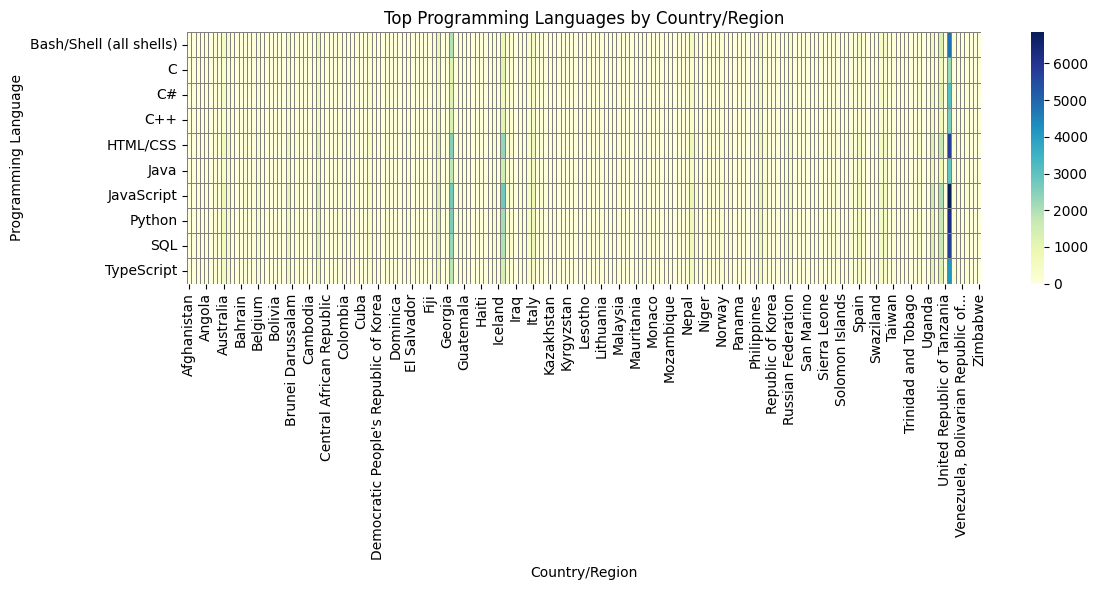

In [12]:
## Write your code here
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Drop missing values from required columns
df_lang = df.dropna(subset=['LanguageHaveWorkedWith', 'Country']) 

# Step 2: Split the 'LanguageHaveWorkedWith' column into lists
df_lang['LanguageList'] = df_lang['LanguageHaveWorkedWith'].str.split(';')

# Step 3: Explode the DataFrame so each language has its own row
df_exploded = df_lang.explode('LanguageList')

# Step 4: Group by Country and Language, count occurrences
lang_counts = df_exploded.groupby(['Country', 'LanguageList']).size().reset_index(name='Count')

# Step 5: Create a pivot table for heatmap
lang_pivot = lang_counts.pivot_table(index='LanguageList', columns='Country', values='Count', fill_value=0)

# Step 6: Filter to top N languages globally
top_languages = df_exploded['LanguageList'].value_counts().head(10).index
lang_pivot = lang_pivot.loc[lang_pivot.index.isin(top_languages)]

# Step 7: Plot heatmap of top programming languages by country
plt.figure(figsize=(12, 6))
sns.heatmap(lang_pivot, cmap='YlGnBu', linewidths=0.5, linecolor='gray')
plt.title('Top Programming Languages by Country/Region')
plt.xlabel('Country/Region')
plt.ylabel('Programming Language')
plt.tight_layout()
plt.show()


#### Step 8: Correlation Between Experience and Satisfaction


Examine how years of experience (`YearsCodePro`) correlate with job satisfaction (`JobSatPoints_1`). Use a scatter plot to visualize this relationship.


/tmp/ipykernel_299/1852524251.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['JobSatPoints_1'] = pd.to_numeric(df_corr['JobSatPoints_1'], errors='coerce')


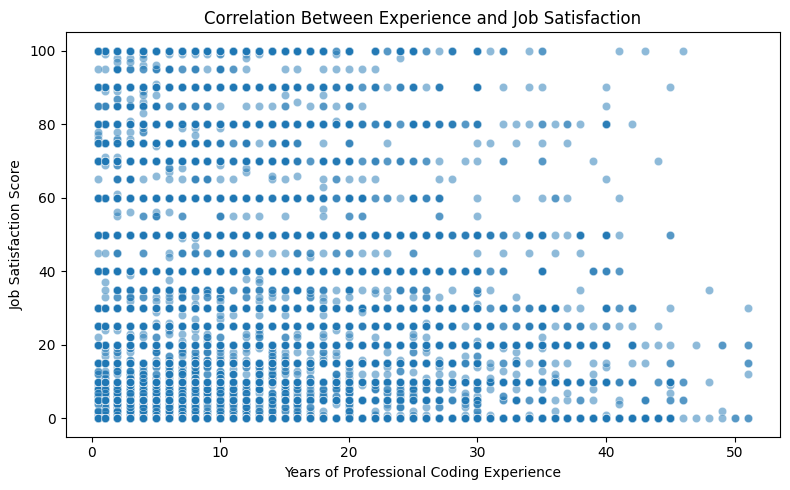

In [13]:
## Write your code here
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Convert YearsCodePro to numeric
def convert_experience(val):
    if val == "Less than 1 year":
        return 0.5
    elif val == "More than 50 years":
        return 51
    try:
        return float(val)
    except:
        return None

df['YearsCodePro'] = df['YearsCodePro'].apply(convert_experience)

# Step 2: Drop missing values in both columns
df_corr = df.dropna(subset=['YearsCodePro', 'JobSatPoints_1'])

# Step 3: Convert JobSatPoints_1 to numeric if needed
df_corr['JobSatPoints_1'] = pd.to_numeric(df_corr['JobSatPoints_1'], errors='coerce')

# Step 4: Plot the scatter plot
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_corr, x='YearsCodePro', y='JobSatPoints_1', alpha=0.5)
plt.title('Correlation Between Experience and Job Satisfaction')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Job Satisfaction Score')
plt.tight_layout()
plt.show()



#### Step 9: Educational Background and Employment Type


Explore how educational background (`EdLevel`) relates to employment type (`Employment`). Use cross-tabulation and visualizations to understand if higher education correlates with specific employment types.


Cross-tabulation (%):

Employment                                          Employed, full-time  \
EdLevel                                                                   
Associate degree (A.A., A.S., etc.)                               59.06   
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                      67.38   
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                   70.78   
Primary/elementary school                                         13.96   
Professional degree (JD, MD, Ph.D, Ed.D, etc.)                    69.80   
Secondary school (e.g. American high school, Ge...                25.20   
Some college/university study without earning a...                46.78   
Something else                                                    40.45   

Employment                                          Employed, full-time;Employed, part-time  \
EdLevel                                                                                       
Associate degree (A.A., A.S., etc.) 

/tmp/ipykernel_299/1308211890.py:21: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


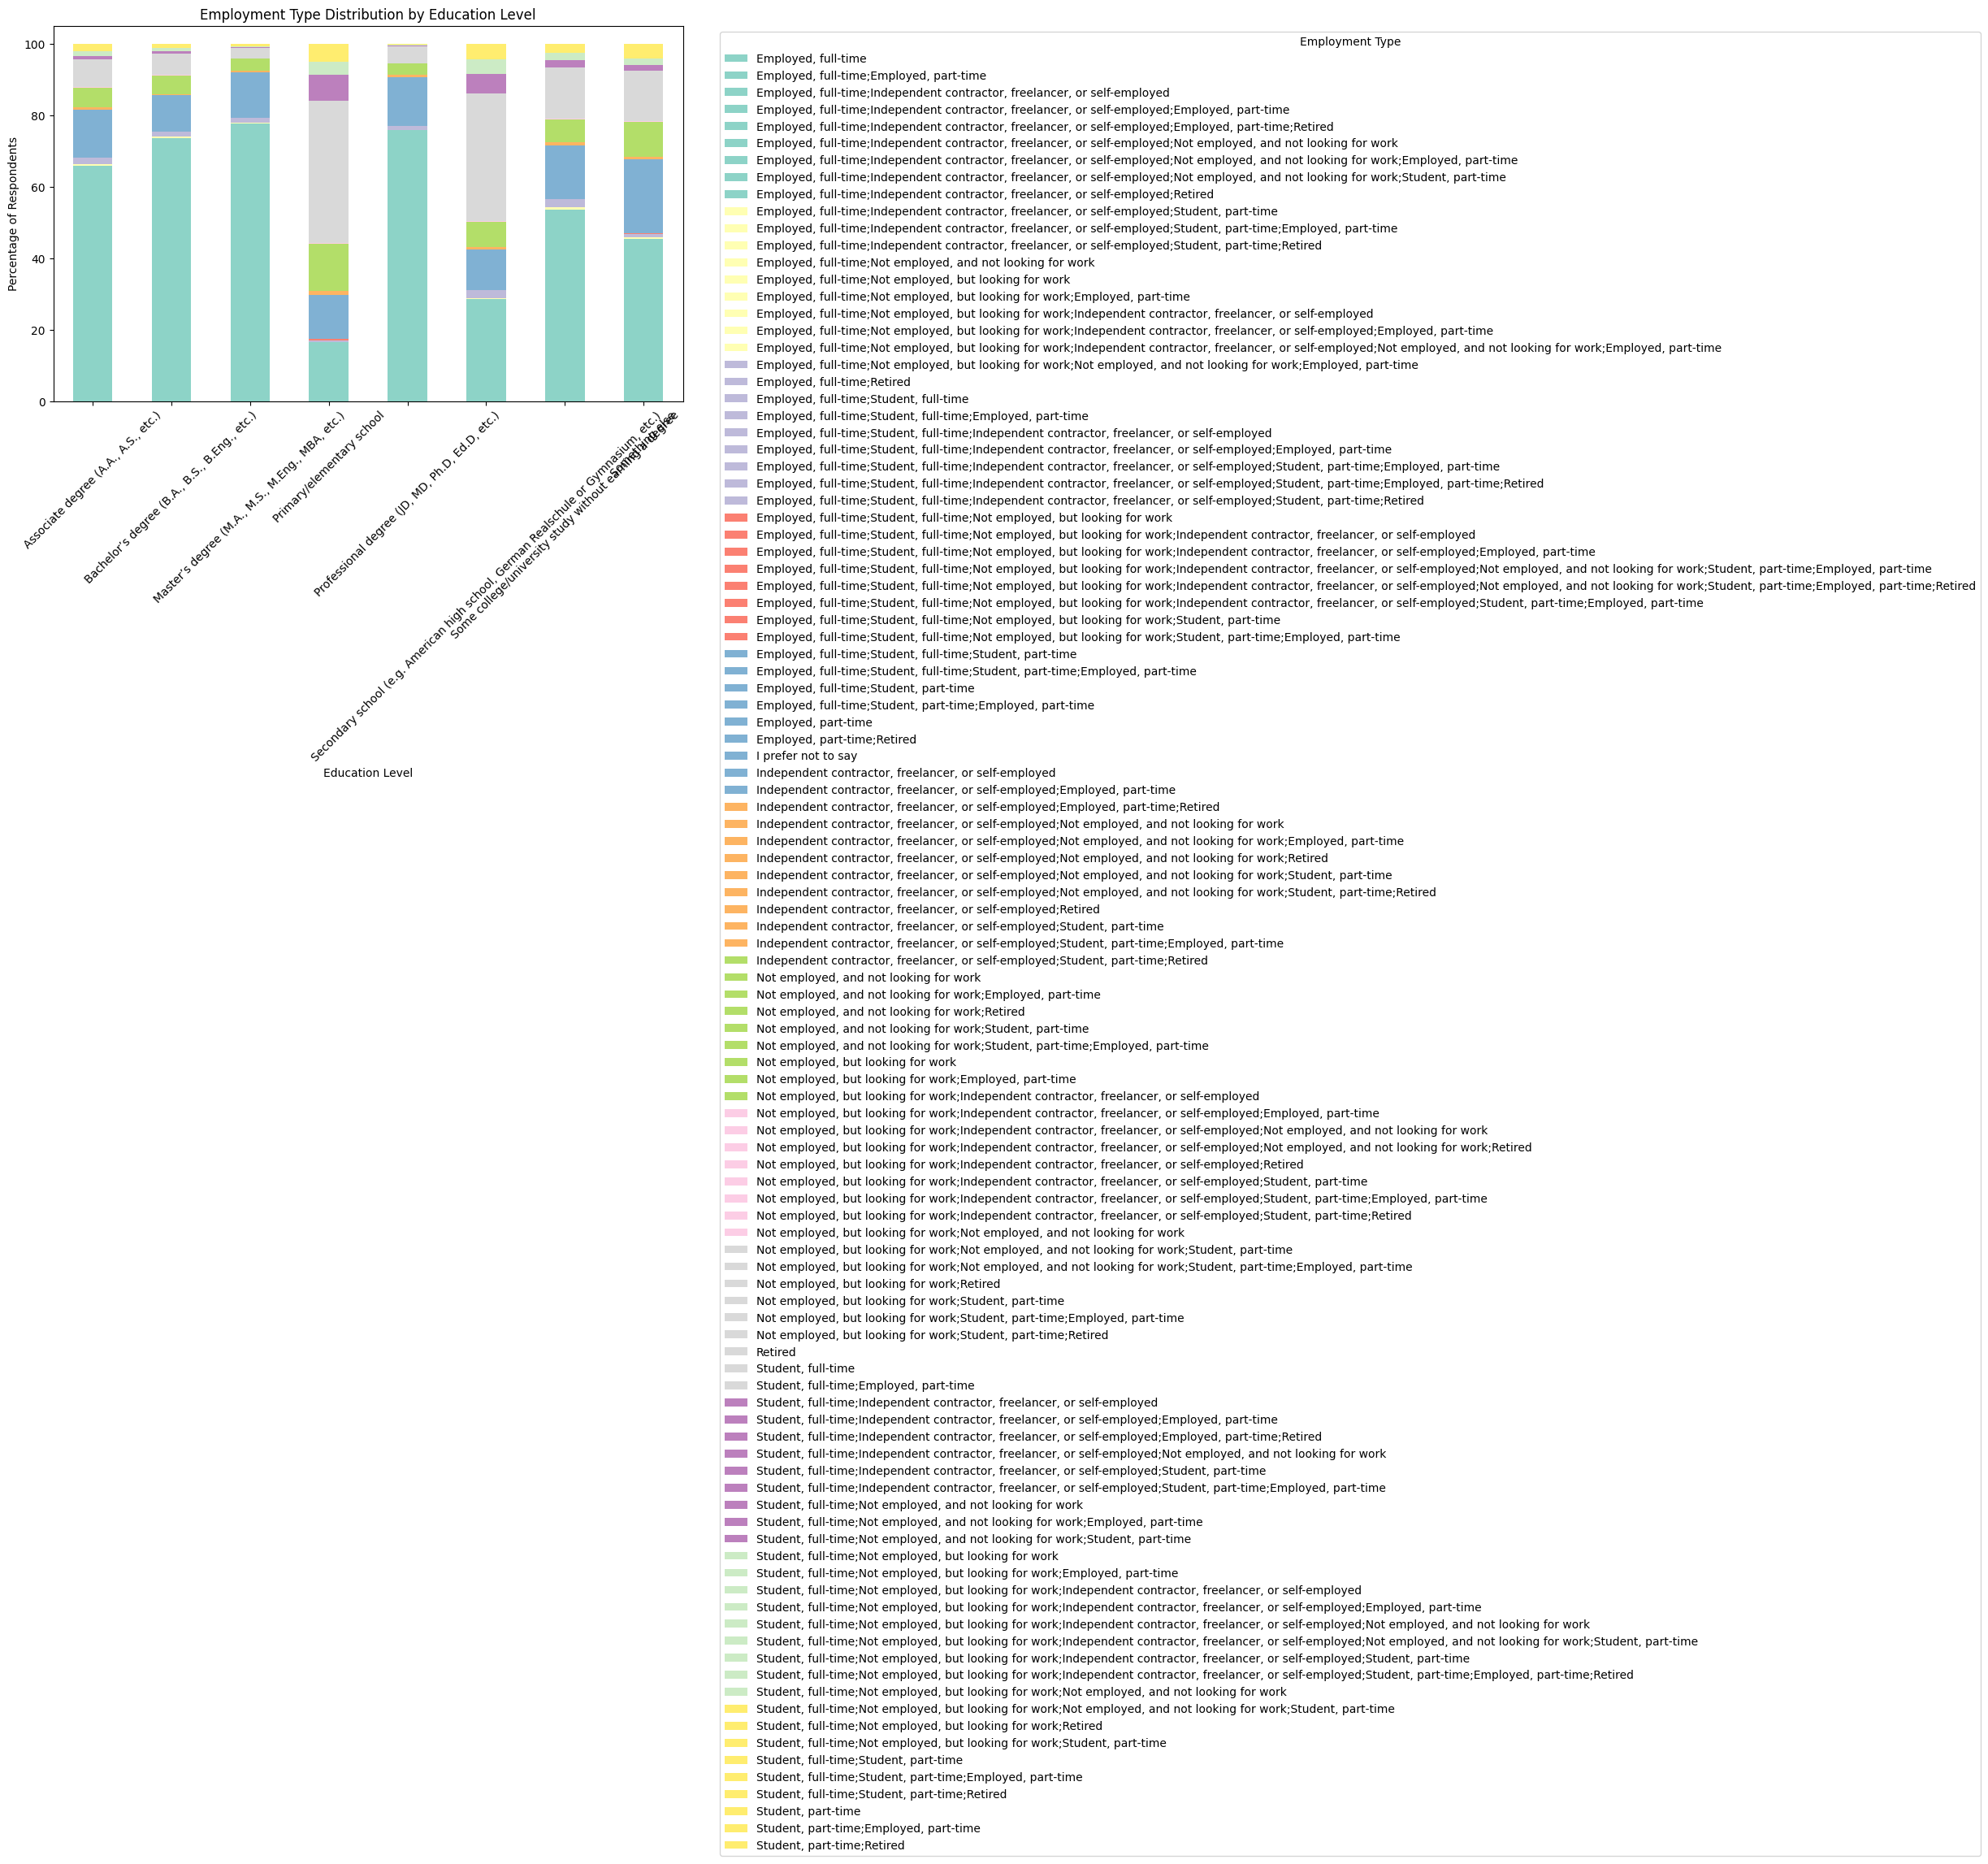

In [14]:
## Write your code here
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Drop missing values in both columns
df_edu = df.dropna(subset=['EdLevel', 'Employment'])

# Step 2: Cross-tabulate EdLevel and Employment
edu_emp_ct = pd.crosstab(df_edu['EdLevel'], df_edu['Employment'], normalize='index') * 100
print("Cross-tabulation (%):\n")
print(edu_emp_ct.round(2))

# Step 3: Plot stacked bar chart
edu_emp_ct.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set3')

plt.title('Employment Type Distribution by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Percentage of Respondents')
plt.legend(title='Employment Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()


#### Step 10: Save the Cleaned and Analyzed Dataset


After your analysis, save the modified dataset for further use or sharing.


In [ ]:
## Write your code here


<h2>Summary</h2>


In this revised lab, you:

- Loaded and explored the structure of the dataset.

- Handled missing data effectively.

- Analyzed key variables, including working hours, job satisfaction, and remote work trends.

- Investigated programming language usage by region and examined the relationship between experience and satisfaction.

- Used cross-tabulation to understand educational background and employment type.


Copyright © IBM Corporation. All rights reserved.
